# **Load Data**

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, MaxPool2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras.losses import SparseCategoricalCrossentropy

import itertools
import numpy as np
import os
import shutil
import random
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/flowers/archive.zip', 'r') # Opens the zip file in read mode
zip_ref.extractall('/tmp/dataset')
zip_ref.close()

In [ ]:
print('all daisy images: ', len(os.listdir('/tmp/dataset/flowers/daisy')))
print('all dandelion images: ', len(os.listdir('/tmp/dataset/flowers/dandelion')))
print('all rose images: ', len(os.listdir('/tmp/dataset/flowers/rose')))
print('all sunflower images: ', len(os.listdir('/tmp/dataset/flowers/sunflower')))
print('all tuplip images: ', len(os.listdir('/tmp/dataset/flowers/tulip')))

all daisy images:  764
all dandelion images:  1052
all rose images:  784
all sunflower images:  733
all tuplip images:  984


# **3 Sets - Train, Valid and test**

We have our data divided only by flower type - we need to create 3 sets: for training, validation and testing.



Directories to specific folders:

In [ ]:
folder_names = [ 'daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
dataset_direct='/tmp/dataset/flowers/'
dataset_direct_train = dataset_direct + 'train/'
dataset_direct_valid = dataset_direct + 'valid/'
dataset_direct_test = dataset_direct + 'test/'

Function that clears the folder (found in Stack Overflow)

In [ ]:
import os, shutil
def clear_directory(folder):
#folder = '/tmp/dataset/flowers/train/tulip'
  for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print('Failed to delete %s. Reason: %s' % (file_path, e))

Clearing and deleting all created folders - in case they exist

In [ ]:
if os.path.exists(dataset_direct_train):
  for name in folder_names:
    clear_directory(dataset_direct_train+name)
  for name in folder_names:
    os.rmdir(dataset_direct_train+name)

  os.rmdir(dataset_direct+'train')

if os.path.exists(dataset_direct_valid):
  for name in folder_names:
    clear_directory(dataset_direct_valid+name)
  for name in folder_names:
    os.rmdir(dataset_direct_valid+name)
  os.rmdir(dataset_direct+'valid')

if os.path.exists(dataset_direct_test):
  for name in folder_names:
    clear_directory(dataset_direct_test+name)
  for name in folder_names:
    os.rmdir(dataset_direct_test+name)
  os.rmdir(dataset_direct+'test')




Creating new folders - in order to divide images into 3 categories - train, validation and testing

In [ ]:
os.chdir('/tmp/dataset/flowers')
if os.path.isdir('train/daisy') is False:
  os.makedirs('train/daisy')
  os.makedirs('train/dandelion')
  os.makedirs('train/rose')
  os.makedirs('train/sunflower')
  os.makedirs('train/tulip')
  
  os.makedirs('valid/daisy')
  os.makedirs('valid/dandelion')
  os.makedirs('valid/rose')
  os.makedirs('valid/sunflower')
  os.makedirs('valid/tulip')

  os.makedirs('test/daisy')
  os.makedirs('test/dandelion')
  os.makedirs('test/rose')
  os.makedirs('test/sunflower')
  os.makedirs('test/tulip')



In [ ]:
folder_names[:5]

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

Main code that splits images between proper folders

In [ ]:
for flower_type in folder_names[:5]:
  img_list = os.listdir('/tmp/dataset/flowers/'+flower_type)
  for img in random.sample(img_list, round(len(os.listdir('/tmp/dataset/flowers/'+flower_type))*0.7)):
    shutil.move(dataset_direct+flower_type+'/'+img, '/tmp/dataset/flowers/train/'+flower_type)
  img_list = os.listdir('/tmp/dataset/flowers/'+flower_type)
  for img in random.sample(img_list, round(len(os.listdir('/tmp/dataset/flowers/'+flower_type))*0.66666)):
    shutil.move(dataset_direct+flower_type+'/'+img, '/tmp/dataset/flowers/valid/'+flower_type)
  
  source_dir = '/tmp/dataset/flowers/'+flower_type +'/'
  target_dir = '/tmp/dataset/flowers/test/'+flower_type +'/'
  file_names = os.listdir(source_dir)

  for file_name in file_names:
    shutil.move(source_dir+file_name, target_dir)

In [ ]:
print('train daisy images: ', len(os.listdir('/tmp/dataset/flowers/train/daisy')))
print('valid daisy images: ', len(os.listdir('/tmp/dataset/flowers/valid/daisy')))
print('test daisy images: ', len(os.listdir('/tmp/dataset/flowers/test/daisy')))

train daisy images:  535
valid daisy images:  153
test daisy images:  76


# **Show Photos**

In [ ]:
images = random.sample(os.listdir('/tmp/dataset/flowers/valid/rose'),20)

In [ ]:
images

['5979193298_639e877248.jpg',
 '5002450022_33337e895b_n.jpg',
 '17105684129_e2cb69ea24_n.jpg',
 '17867791274_25bb3f8a41_n.jpg',
 '14154164774_3b39d36778.jpg',
 '26811158051_8f264eea6b_n.jpg',
 '8337607102_d9e0fa887e.jpg',
 '18492288871_8c9d5657bb_n.jpg',
 '7456611336_52fec6b57e_n.jpg',
 '12240165555_98625b1e88_n.jpg',
 '5502949025_96d11a17ff_n.jpg',
 '4809566219_88f9a1aea3.jpg',
 '14982802401_a3dfb22afb.jpg',
 '8692051081_dffa8709e7_m.jpg',
 '7481118926_43fa291306_n.jpg',
 '17990320484_93bba345d2_m.jpg',
 '2053476785_c162a3e358.jpg',
 '15060816740_68e1b2c31b.jpg',
 '16100313047_c2e23cbb3d_n.jpg',
 '18490508225_0fc630e963_n.jpg']

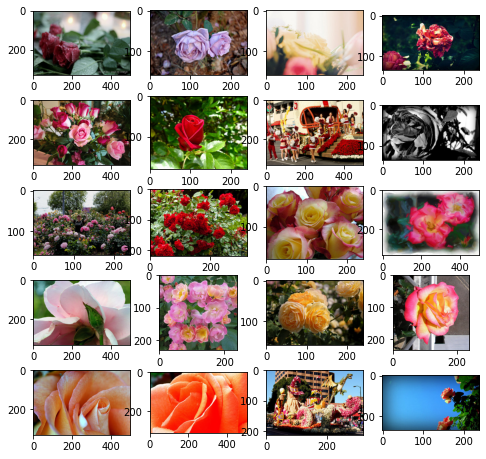

In [ ]:
import cv2
w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(0, columns*rows ):
    IMG = cv2.imread('/tmp/dataset/flowers/valid/rose/'+images[i])
    RGB_img = cv2.cvtColor(IMG, cv2.COLOR_BGR2RGB)
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(RGB_img)
plt.show()

# **Images preperation - Preprocesed Data**

In [ ]:
batch_size = 32
num_of_epochs = 16

In [ ]:
train_prep = ImageDataGenerator(rescale=1/255)
valid_prep = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train_prep.flow_from_directory(
    dataset_direct_train,
    target_size=(320,240),
    batch_size=batch_size,
    class_mode='sparse'
)

valid_dataset = valid_prep.flow_from_directory(
    dataset_direct_valid,
    target_size=(320,240),
    batch_size=batch_size,
    class_mode='sparse'
)

Found 3022 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


In [ ]:
test_prep = ImageDataGenerator(rescale=1/255)

test_dataset = test_prep.flow_from_directory(
    dataset_direct_test,
    target_size=(320,240),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

Found 430 images belonging to 5 classes.


In [ ]:
train_dataset.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
train_dataset.classes

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [ ]:
imgs, labels = next(train_dataset)

In [ ]:
# This function will plot images in the form of a grid with 1 row and 10 columns where images are placed 
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip( images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

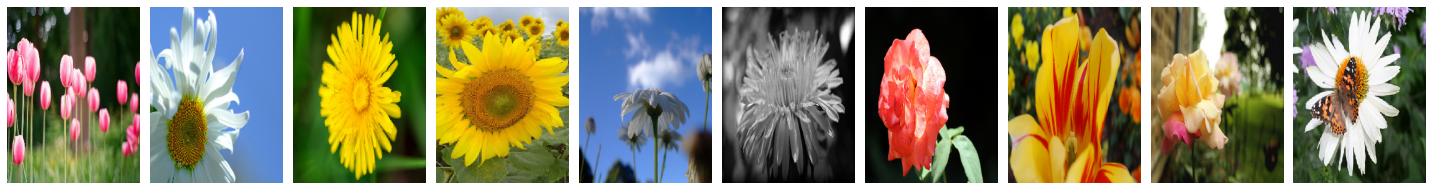

[4. 0. 1. 3. 0. 1. 2. 4. 2. 0. 0. 2. 1. 3. 2. 4. 1. 2. 4. 3. 3. 1. 4. 3.
 4. 1. 3. 2. 1. 4. 1. 1.]


In [ ]:
plotImages(imgs)
print(labels)

# **Creating a CNN model**

In [ ]:
model_cnn_1 = models.Sequential([
    # cnn
    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(320,240,3)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    #
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    #
    layers.Flatten(),
    ##
    layers.Dense(64, activation='relu'),
    ##
    layers.Dense(16, activation='relu'),
    ##
    layers.Dense(5,activation='softmax')
])

In [ ]:
model_cnn_1.compile(loss='sparse_categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

In [ ]:
model_cnn_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 318, 238, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 316, 236, 32)      4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 158, 118, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 156, 116, 32)      9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 154, 114, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 77, 57, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 280896)            0

# **Training**

In [ ]:
model_cnn_1.fit(train_dataset,
                epochs=num_of_epochs,
                validation_data=valid_dataset,
                )

Epoch 1/16
95/95 [==============================] - 60s 296ms/step - loss: 1.6755 - accuracy: 0.2181 - val_loss: 1.6057 - val_accuracy: 0.2439
Epoch 2/16
95/95 [==============================] - 26s 278ms/step - loss: 1.6044 - accuracy: 0.2346 - val_loss: 1.6026 - val_accuracy: 0.2555
Epoch 3/16
95/95 [==============================] - 27s 278ms/step - loss: 1.4270 - accuracy: 0.3653 - val_loss: 1.2487 - val_accuracy: 0.4659
Epoch 4/16
95/95 [==============================] - 27s 279ms/step - loss: 1.1869 - accuracy: 0.5215 - val_loss: 1.0927 - val_accuracy: 0.5803
Epoch 5/16
95/95 [==============================] - 27s 279ms/step - loss: 0.9890 - accuracy: 0.6046 - val_loss: 1.0494 - val_accuracy: 0.5607
Epoch 6/16
95/95 [==============================] - 27s 280ms/step - loss: 0.6995 - accuracy: 0.7287 - val_loss: 1.1268 - val_accuracy: 0.5618
Epoch 7/16
95/95 [==============================] - 27s 279ms/step - loss: 0.3668 - accuracy: 0.8584 - val_loss: 1.7790 - val_accuracy: 0.5503

1st attempt finished at 58/59 % accuracy. It certainly isn't satisfying result. Let's try modify our model a bit.

Model uses around 18 millions parameters

# **CNN model 2**

In [ ]:
model_cnn_2 = models.Sequential([
    # cnn
    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(320,240,3)),
    layers.MaxPool2D(2,2),
    #
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    #
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    #
    layers.Flatten(),
    ##
    layers.Dense(256, activation='relu'),
    ##
    layers.Dense(32, activation='relu'),
    ##
    layers.Dense(5,activation='softmax')
])

In [ ]:
model_cnn_2.compile(loss='sparse_categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

In [ ]:
model_cnn_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 318, 238, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 159, 119, 16)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 157, 117, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 78, 58, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 76, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 38, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 68096)            

In [ ]:
model_cnn_2.fit(train_dataset,
                epochs=num_of_epochs,
                validation_data=valid_dataset,
                )

Epoch 1/16
95/95 [==============================] - 19s 185ms/step - loss: 1.4233 - accuracy: 0.3822 - val_loss: 1.0869 - val_accuracy: 0.5584
Epoch 2/16
95/95 [==============================] - 17s 178ms/step - loss: 1.0369 - accuracy: 0.5880 - val_loss: 1.1054 - val_accuracy: 0.5665
Epoch 3/16
95/95 [==============================] - 17s 180ms/step - loss: 0.8154 - accuracy: 0.6949 - val_loss: 0.9907 - val_accuracy: 0.6116
Epoch 4/16
95/95 [==============================] - 17s 180ms/step - loss: 0.4938 - accuracy: 0.8160 - val_loss: 1.1883 - val_accuracy: 0.6012
Epoch 5/16
95/95 [==============================] - 17s 178ms/step - loss: 0.2464 - accuracy: 0.9216 - val_loss: 1.6454 - val_accuracy: 0.5884
Epoch 6/16
95/95 [==============================] - 17s 178ms/step - loss: 0.1307 - accuracy: 0.9593 - val_loss: 1.5736 - val_accuracy: 0.6023
Epoch 7/16
95/95 [==============================] - 17s 178ms/step - loss: 0.0780 - accuracy: 0.9775 - val_loss: 2.2123 - val_accuracy: 0.5850

# **Confusion Matrix - function**

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix
  Normalization can be applied by setting 'normalization=True'
  """
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title),
  plt.colorbar(),
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('COnfusion matrix, without normalization')

  print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

# **Predict CNN2 model**

In [ ]:
predictions_cnn_2 = model_cnn_2.predict(x=test_dataset)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=test_dataset.classes, y_pred=np.argmax(predictions_cnn_2, axis=-1))

In [ ]:
test_dataset.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

COnfusion matrix, without normalization
[[41 14  5  4 12]
 [16 69  3  9  8]
 [ 7  3 37  1 30]
 [ 2  6  2 52 11]
 [ 5  3 14  6 70]]


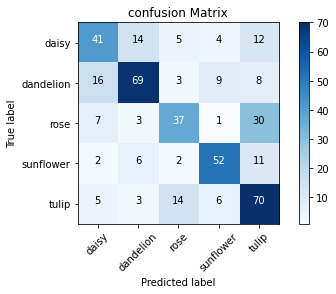

In [ ]:
cm_plot_labels = folder_names
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion Matrix')

# **CNN model 3**

In [ ]:
batch_size = 64

train_dataset = train_prep.flow_from_directory(
    dataset_direct_train,
    target_size=(320,240),
    batch_size=batch_size,
    class_mode='sparse'
)

valid_dataset = valid_prep.flow_from_directory(
    dataset_direct_valid,
    target_size=(320,240),
    batch_size=batch_size,
    class_mode='sparse'
)

test_dataset = test_prep.flow_from_directory(
    dataset_direct_test,
    target_size=(320,240),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

Found 3022 images belonging to 5 classes.
Found 865 images belonging to 5 classes.
Found 430 images belonging to 5 classes.


In [ ]:
model_cnn_3 = models.Sequential([
    # cnn
    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(320,240,3)),
    layers.MaxPool2D(2,2),
    #
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    #
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    #
    layers.Flatten(),
    ##
    layers.Dense(256, activation='relu'),
    ##
    layers.Dense(32, activation='relu'),
    ##
    layers.Dense(5,activation='softmax')
])

In [ ]:
model_cnn_3.compile(loss='sparse_categorical_crossentropy',
                    optimizer='adam',
                    metrics=['accuracy'])

In [ ]:
model_cnn_3.summary()

In [ ]:
model_cnn_3.fit(train_dataset,
                epochs=num_of_epochs,
                validation_data=valid_dataset,
                )

Epoch 1/16
48/48 [==============================] - 19s 351ms/step - loss: 1.7927 - accuracy: 0.3355 - val_loss: 1.1521 - val_accuracy: 0.4925
Epoch 2/16
48/48 [==============================] - 16s 337ms/step - loss: 1.0844 - accuracy: 0.5516 - val_loss: 1.0791 - val_accuracy: 0.5688
Epoch 3/16
48/48 [==============================] - 16s 336ms/step - loss: 0.9499 - accuracy: 0.6390 - val_loss: 0.9930 - val_accuracy: 0.6127
Epoch 4/16
48/48 [==============================] - 16s 336ms/step - loss: 0.8036 - accuracy: 0.6870 - val_loss: 1.0330 - val_accuracy: 0.5780
Epoch 5/16
48/48 [==============================] - 16s 335ms/step - loss: 0.6163 - accuracy: 0.7747 - val_loss: 1.0679 - val_accuracy: 0.6081
Epoch 6/16
48/48 [==============================] - 16s 337ms/step - loss: 0.4166 - accuracy: 0.8448 - val_loss: 1.1394 - val_accuracy: 0.6277
Epoch 7/16
48/48 [==============================] - 16s 336ms/step - loss: 0.2621 - accuracy: 0.9143 - val_loss: 1.5288 - val_accuracy: 0.5988